# 📈 **Linear Regression**

**In Machine Learning and this notebook we use Scikit-learn a lot.**

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/download_(1)_slz6.png" border="0" alt="آپلود عکس" /></a>

### **What is scikit-learn used for?**

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

#### **What is linear regression used for?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# **Making Predictions with Linear Regression**

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. Imagine we are predicting weight (y) from height (x). Our linear regression model representation for this problem would be:

**y = B0 + B1 * x1**

or

**weight =B0 +B1 * height**

Where B0 is the bias coefficient and B1 is the coefficient for the height column. We use a learning technique to find a good set of coefficient values. Once found, we can plug in different height values to predict the weight.

For example, lets use B0 = 0.1 and B1 = 0.5. Let’s plug them in and calculate the weight (in kilograms) for a person with the height of 182 centimeters.

weight = 0.1 + 0.5 * 182

weight = 91.1

You can see that the above equation could be plotted as a line in two-dimensions. The B0 is our starting point regardless of what height we have. We can run through a bunch of heights from 100 to 250 centimeters and plug them to the equation and get weight values, creating our line.

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/sample-height-vs-weight-linear-regression_10h7.png" border="0" alt="آپلود عکس" /></a>

Now that we know how to make predictions given a learned linear regression model, let’s look at some rules of thumb for preparing our data to make the most of this type of model.

# 📤 Import & Install Libraries

In [1]:
!pip install hvplot

     |████████████████████████████████| 3.1 MB 884 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

## 💾 Check out the Data

In [3]:
df=pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

In [4]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [5]:
df.shape

(414, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.corr()

No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 latitude                                 0.054420   
X6 longitude                               -0.048520   
Y house price of unit area                 -0.210567   

                                        X3 distance to the nearest MRT station  \
No                                                                   -0.013573   
X1 transaction date                                                   0.060880   
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   
X5 latitude                                                          -0.591067   
X6 longitude                                                         -0.806317   
Y house price of unit area                                           -0.673613   

                                        X4 number of convenience stores  \
No                                                            -0.012699   
X1 transaction date                                            0.009635   
X2 house age                                                   0.049593   
X3 distance to the nearest MRT station                        -0.602519   
X4 number of convenience stores                                1.000000   
X5 latitude                                                    0.444143   
X6 longitude                                                   0.449099   
Y house price of unit area                                     0.571005   

                                        X5 latitude  X6 longitude  \
No                                        -0.010110     -0.011059   
X1 transaction date                        0.035058     -0.041082   
X2 house age                               0.054420     -0.048520   
X3 distance to the nearest MRT station    -0.591067     -0.806317   
X4 number of convenience stores            0.444143      0.449099   
X5 latitude                                1.000000      0.412924   
X6 longitude                               0.412924      1.000000   
Y house price of unit area                 0.546307      0.523287   

                                        Y house price of unit area  
No                                                       -0.028587  
X1 transaction date                                       0.087491  
X2 house age                                             -0.210567  
X3 distance to the nearest MRT station                   -0.673613  
X4 number of convenience stores                           0.571005  
X5 latitude                                               0.546307  
X6 longitude                                              0.523287  
Y house price of unit area                                1.000000

<AxesSubplot:>

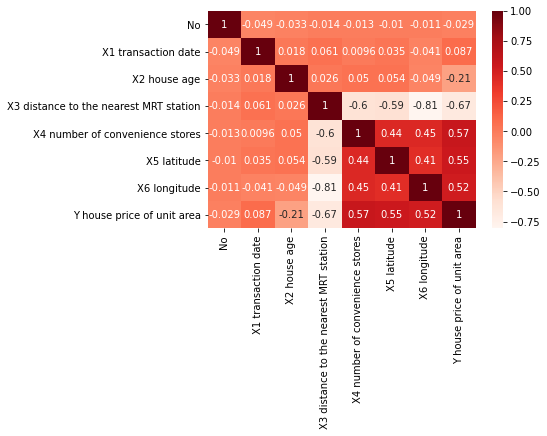

In [8]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

# 📊 Exploratory Data Analysis (EDA)

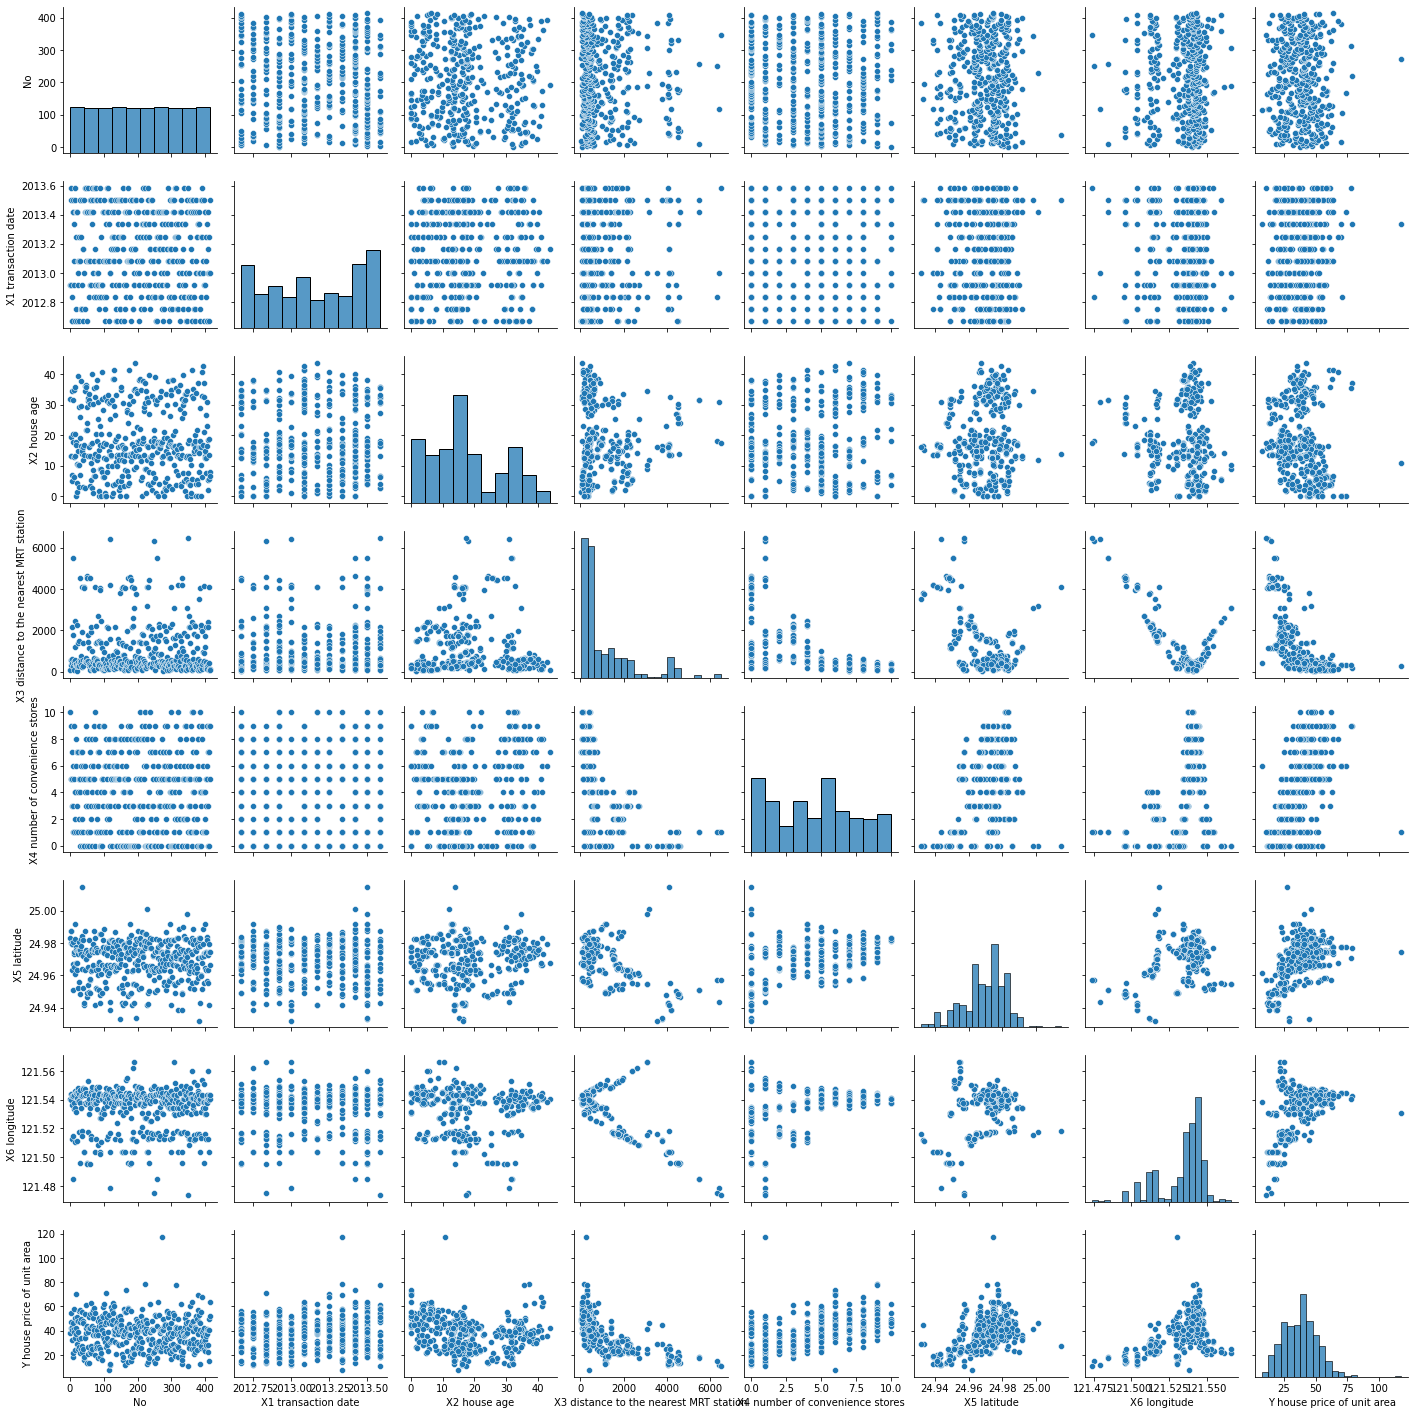

In [9]:
sns.pairplot(df)

# 📈 Training a Linear Regression Model

## X and y arrays

In [10]:
X=df.drop('Y house price of unit area', axis=1)

y=df['X4 number of convenience stores']

In [11]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
X_train.shape

(289, 7)

In [14]:
X_test.shape

(125, 7)

# ✔️ Linear Regression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

## ✔️ Model Evaluation

In [17]:
model.coef_

array([-1.26803420e-17, -5.07334605e-15, -5.99955923e-17,  7.07810166e-18,
        1.00000000e+00,  1.09793322e-15, -1.38744293e-15])

In [18]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

Coedicients
No                                     -1.268034e-17
X1 transaction date                    -5.073346e-15
X2 house age                           -5.999559e-17
X3 distance to the nearest MRT station  7.078102e-18
X4 number of convenience stores         1.000000e+00
X5 latitude                             1.097933e-15
X6 longitude                           -1.387443e-15

## ✔️ Predictions from our Model

In [19]:
y_pred = model.predict(X_test)

## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [20]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [21]:
MAE

8.536346855515258e-15

In [22]:
MSE

1.2905495539452208e-28

In [23]:
RMSE

1.1360235710341668e-14

In [24]:
df['X4 number of convenience stores'].mean()

4.094202898550725

## **Residual Histogram**

* **Often for Linear Regression it is a good idea to separately evaluate residuals $$(y-\hat{y})$$ and not just calculate performance metrics (e.g. RMSE).**

* **Let's explore why this is important...**

* **The residual eerors should be random and close to a normal distribution.**


<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/download_ycg.png" border="0" alt="آپلود عکس" /></a>

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/2_pe68.png" border="0" alt="آپلود عکس" /></a>

In [25]:
test_residual= y_test - y_pred

In [26]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

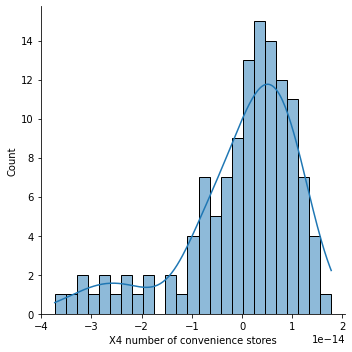

In [27]:
sns.displot(test_residual, bins=25, kde=True)

* **Residual plot shows residual error VS. true y value.**

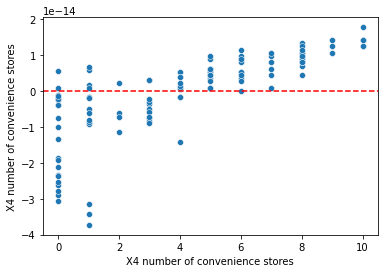

In [28]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

* **Residualplot showing a clear pattern, indicating Linear Regression no valid!**

# Finished, but you can copy this notebook and start practicing.